In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
LR = 0.0002
N_TRAIN = 100
N_TEST = 200

In [3]:
def lj_potential(r, epsilon = 1.0, sigma = 3.6):
    return 4* epsilon * (
        (sigma / r)**12. - (sigma / r)**6.
    )


In [4]:
model = nn.Sequential(
    nn.Linear(1, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 1)
)


In [5]:
X_train = np.array(3. + 8. * np.linspace(0., 1., N_TRAIN)).reshape(N_TRAIN, -1)
y_train = np.array([lj_potential(x) for x in X_train])

X_train = torch.from_numpy(X_train).to(torch.float32)
y_train = torch.from_numpy(y_train).to(torch.float32)


In [6]:
loss = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=LR)


In [7]:
num_epochs = 10000
for epoch in range(num_epochs):
    predictions = model(X_train)
    MSE = loss(predictions, y_train)
    MSE.backward()
    optimizer.step()
    optimizer.zero_grad()

    if epoch == 0 or (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], MSE Loss: {MSE.item()}')


Epoch [1/10000], MSE Loss: 11.897570610046387
Epoch [1000/10000], MSE Loss: 7.0892157554626465
Epoch [2000/10000], MSE Loss: 2.458796501159668
Epoch [3000/10000], MSE Loss: 0.782210111618042
Epoch [4000/10000], MSE Loss: 0.2676311731338501
Epoch [5000/10000], MSE Loss: 0.09765489399433136
Epoch [6000/10000], MSE Loss: 0.03936166688799858
Epoch [7000/10000], MSE Loss: 0.016164010390639305
Epoch [8000/10000], MSE Loss: 0.008052729070186615
Epoch [9000/10000], MSE Loss: 0.005142980255186558
Epoch [10000/10000], MSE Loss: 0.0015197858447209


In [8]:
X_test = 3. + 8. * np.random.rand(N_TEST, 1)
y_test = np.array([lj_potential(x) for x in X_test])

X_test = torch.from_numpy(X_test).to(torch.float32)
y_test = torch.from_numpy(y_test).to(torch.float32)


In [9]:
torch.save(model, 'model.pth')
loaded_model = torch.load('model.pth')
loaded_model.eval()

with torch.no_grad():
    predictions = loaded_model(X_test)
    print(loss(predictions, y_test).item())


0.00360643258318305


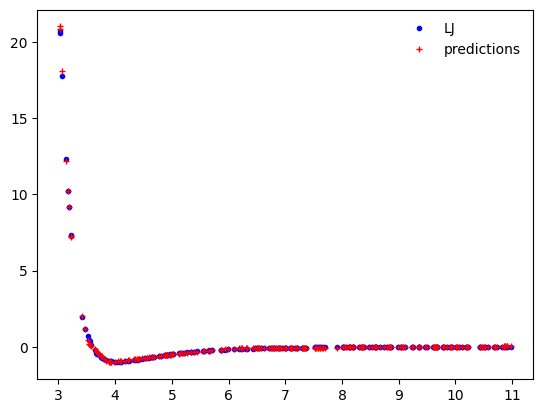

In [10]:
plt.plot(X_test.numpy(), y_test.numpy(),
         'bo', markersize=3, label="LJ")
plt.plot(X_test.numpy(), predictions.numpy(),
         'r+', markersize=4, label="predictions")
plt.legend(frameon=False)